In [1]:
## import important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Read data Frame
df = pd.read_excel("City Power Consumption.xlsx")
df

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [3]:
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [4]:
# Check the shape of the data
df.shape

(52583, 9)

In [5]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

In [6]:
# Create a copy of the data set
df1 = df.copy()
df1.head(2)

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354


In [7]:
# Some important info in the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [8]:
# Convert 'Temperature' and 'Humidity' columns to numeric (handle errors to NaN)
df1['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df1['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

In [9]:
# Agai check all column are converted numeric or not
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52260 non-null  float64
 2   Humidity                      52557 non-null  float64
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [10]:
# Check the Null values
df1.isnull().sum()

S no                              0
Temperature                     323
Humidity                         26
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [11]:
# Handling missing values (mean imputation as an example)
df1['Temperature'].fillna(df1['Temperature'].mean(), inplace=True)
df1['Humidity'].fillna(df1['Humidity'].mean(), inplace=True)
df1['Wind Speed'].fillna(df1['Wind Speed'].mean(), inplace=True)
df1['general diffuse flows'].fillna(df['general diffuse flows'].mean(), inplace=True)
df1['diffuse flows'].fillna(df1['diffuse flows'].mean(), inplace=True)
df1['Air Quality Index (PM)'].fillna(df1['Air Quality Index (PM)'].mean(), inplace=True)

In [12]:
# Drop 'S no' as it's not useful
df1.drop(columns=['S no'], inplace=True)

In [13]:
df1.isnull().sum()

Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

# EDA

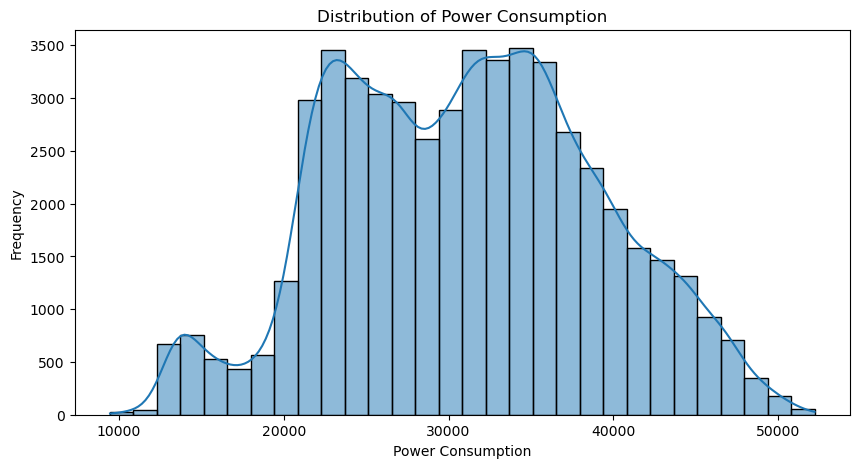

In [15]:
### 1. Distribution Plot of Power Consumption
plt.figure(figsize=(10,5))
sns.histplot(df1[' Power Consumption in A Zone'], kde=True, bins=30)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()


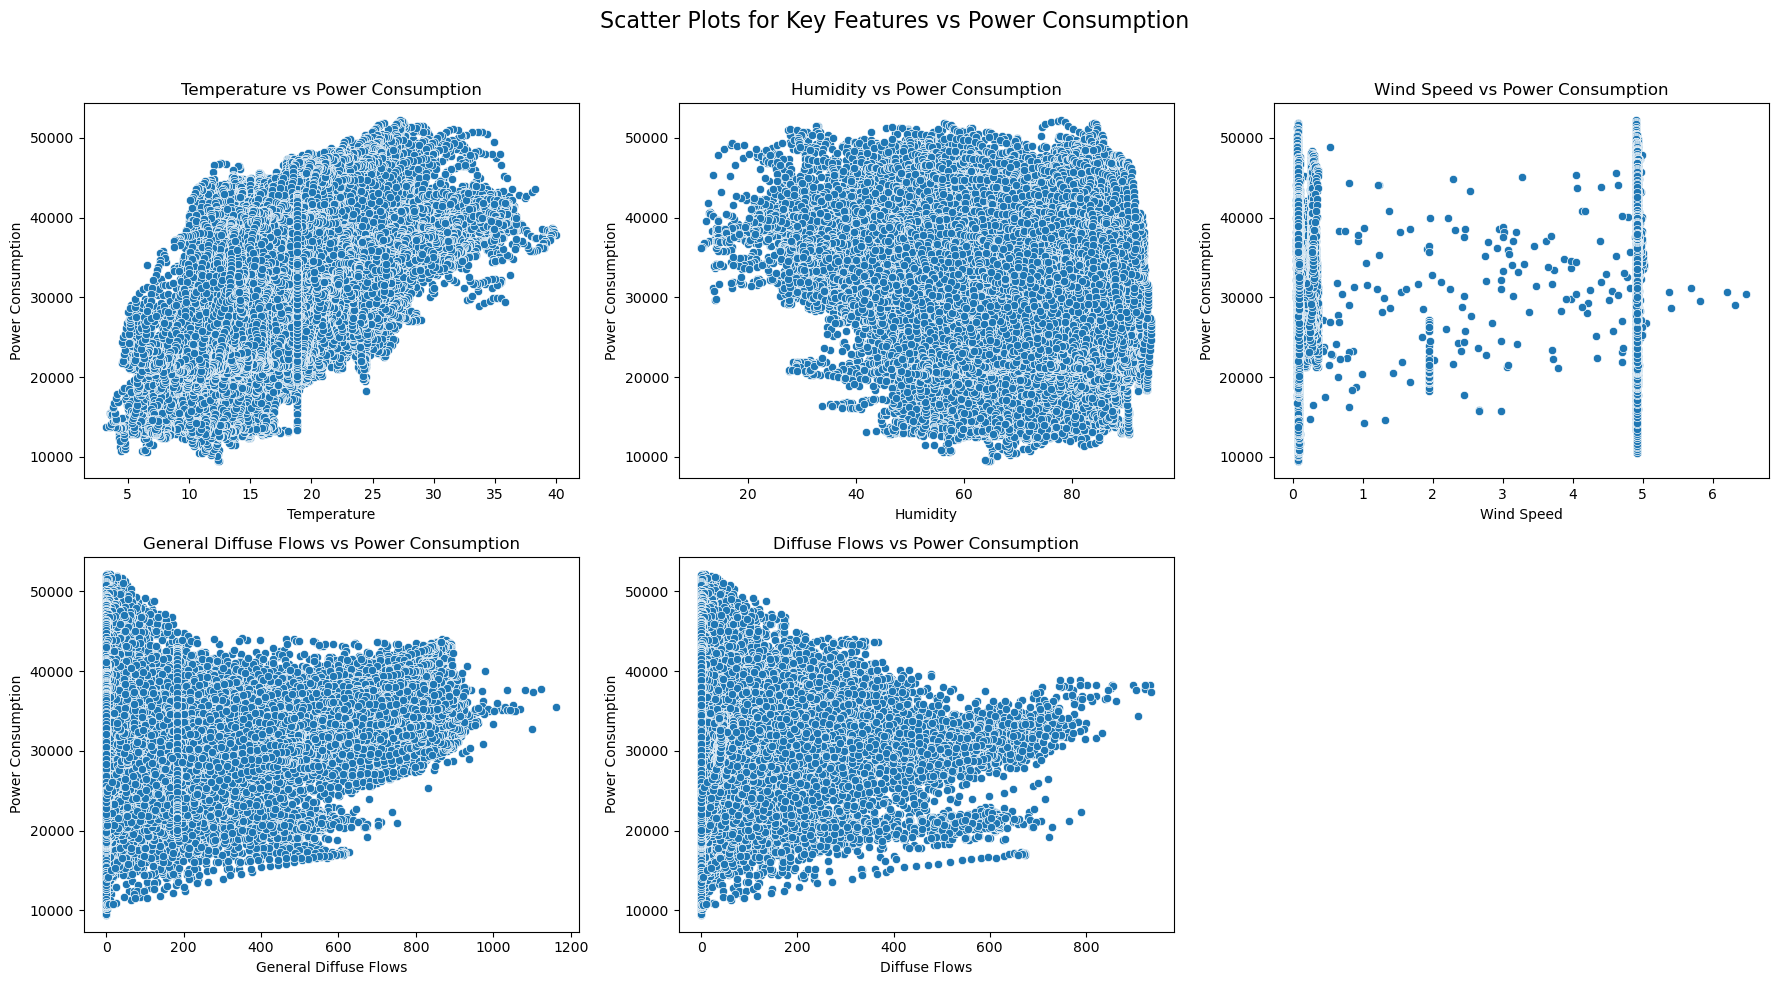

In [16]:
# Create a grid of subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Scatter Plots for Key Features vs Power Consumption', fontsize=16)

# Power Consumption vs Temperature
sns.scatterplot(x='Temperature', y=' Power Consumption in A Zone', data=df1, ax=axs[0, 0])
axs[0, 0].set_title('Temperature vs Power Consumption')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Power Consumption')

# Power Consumption vs Humidity
sns.scatterplot(x='Humidity', y=' Power Consumption in A Zone', data=df1, ax=axs[0, 1])
axs[0, 1].set_title('Humidity vs Power Consumption')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Power Consumption')

# Power Consumption vs Wind Speed
sns.scatterplot(x='Wind Speed', y=' Power Consumption in A Zone', data=df1, ax=axs[0, 2])
axs[0, 2].set_title('Wind Speed vs Power Consumption')
axs[0, 2].set_xlabel('Wind Speed')
axs[0, 2].set_ylabel('Power Consumption')

# Power Consumption vs General Diffuse Flows
sns.scatterplot(x='general diffuse flows', y=' Power Consumption in A Zone', data=df1, ax=axs[1, 0])
axs[1, 0].set_title('General Diffuse Flows vs Power Consumption')
axs[1, 0].set_xlabel('General Diffuse Flows')
axs[1, 0].set_ylabel('Power Consumption')

# Power Consumption vs Diffuse Flows
sns.scatterplot(x='diffuse flows', y=' Power Consumption in A Zone', data=df1, ax=axs[1, 1])
axs[1, 1].set_title('Diffuse Flows vs Power Consumption')
axs[1, 1].set_xlabel('Diffuse Flows')
axs[1, 1].set_ylabel('Power Consumption')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Hide the last empty subplot
axs[1, 2].axis('off')

plt.show()

In [17]:
df1.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [18]:
df1.head(2)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354


In [19]:
# Features and target separation
x = df1.drop(columns=[' Power Consumption in A Zone'])  # Features
y = df1[' Power Consumption in A Zone']  # Target

In [20]:
x.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
0,6.559,73.8,0.083,0.051,0.119,158.0,1
1,6.414,74.5,0.083,0.070,0.085,159.0,1
2,6.313,74.5,0.080,0.062,0.100,151.0,1
3,6.121,75.0,0.083,0.091,0.096,151.0,1
4,5.921,75.7,0.081,0.048,0.085,154.0,1


In [21]:
y.head()

0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name:  Power Consumption in A Zone, dtype: float64

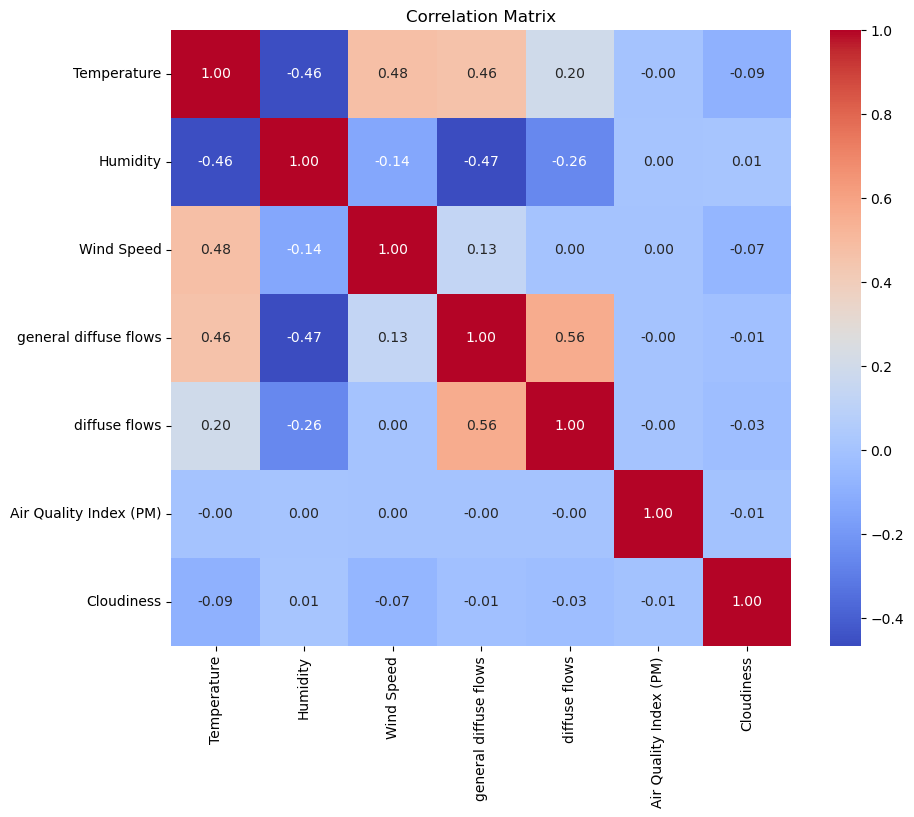

In [22]:
# Correlation Matrix
corr_matrix = x.corr()

# Plot heatmap to visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Variance Inflation Factor (VIF)
# Add a constant for intercept (required for VIF calculation)

x_vif = sm.add_constant(x)

# Calculate VIF for each feature

vif_data = pd.DataFrame()
vif_data["Feature"] = x_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

# Display VIF results
print(vif_data)

                  Feature          VIF
0                   const  2955.515495
1             Temperature     1.813554
2                Humidity     1.424407
3              Wind Speed     1.318978
4   general diffuse flows     1.944917
5           diffuse flows     1.485189
6  Air Quality Index (PM)     1.000058
7              Cloudiness     1.011414


In [24]:
# Apply Standardization

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
x_scaled

array([[-2.1171039 ,  0.35483484, -0.79798602, ..., -0.60252884,
         1.21935438, 10.30017895],
       [-2.14212497,  0.39987652, -0.79798602, ..., -0.60280288,
         1.56766089, 10.30017895],
       [-2.15955343,  0.39987652, -0.79926462, ..., -0.60268198,
        -1.21879115, 10.30017895],
       ...,
       [ 0.        ,  0.11675735, -0.79713361, ..., -0.30131008,
         0.87104788, -0.09708569],
       [ 0.        , -0.03445402, -0.79670741, ..., -0.3022773 ,
        -0.87048465, -0.09708569],
       [ 0.        , -0.13161537, -0.79585501, ..., -0.30751645,
         0.17443487, -0.09708569]])

In [26]:
#  Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


#### Linear Regression

In [28]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
#  Predict on the test set
y_pred = model.predict(x_test)

In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 43194264.45810761
R-Squared: 0.3313549292112553


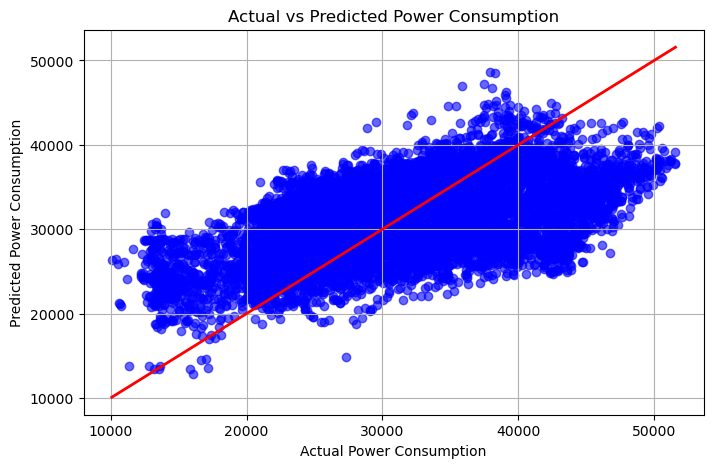

In [32]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.grid(True)
plt.show()


## Random forest

In [34]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Predict on the test set
y_pred_rf = rf_model.predict(x_test)

In [36]:
y_pred_rf

array([38557.2663225, 31233.2524533, 34663.782028 , ..., 40506.4797196,
       22175.735253 , 39108.5186176])

In [37]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [38]:
print("Random Forest MSE:", mse)
print("Random Forest R-Squared:", r2)

Random Forest MSE: 23438194.98319387
Random Forest R-Squared: 0.6371779045132822


In [39]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': df.drop(columns=[' Power Consumption in A Zone', 'S no']).columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)



Feature Importances:
                   Feature  Importance
0             Temperature    0.462128
1                Humidity    0.171054
3   general diffuse flows    0.114454
2              Wind Speed    0.113107
4           diffuse flows    0.097532
5  Air Quality Index (PM)    0.035988
6              Cloudiness    0.005737


In [40]:
# Cross Validation

cv_scores = cross_val_score(rf_model, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -cv_scores.mean())


Cross-validated MSE: 55740856.035565116


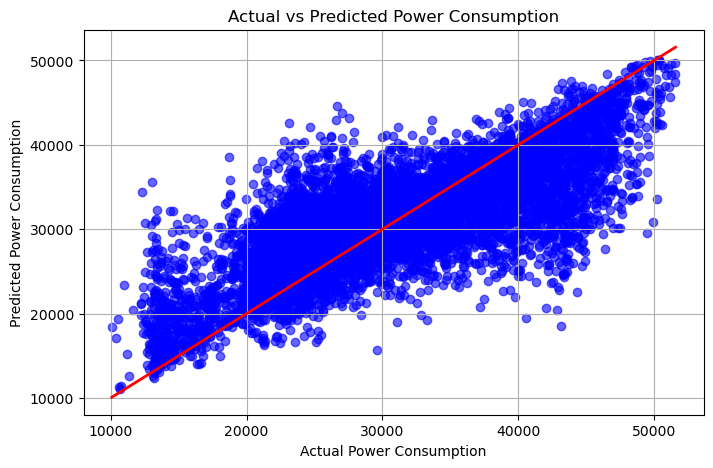

In [41]:
# Plotting Actual vs Predicted values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.grid(True)
plt.show()
